<a href="https://colab.research.google.com/github/single-spec/Data-Analysis/blob/main/SessionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#uploading the dataset from local desktop
from google.colab import files
uploaded = files.upload()

Saving Casper_Takehome_Test_Sessions.xls to Casper_Takehome_Test_Sessions.xls


In [3]:
#reading the order file using pandas
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel(io.BytesIO(uploaded['Casper_Takehome_Test_Sessions.xls']))
df

,Date,Organic X Homepage Sessions,Direct X Homepage Sessions,Google Search X Homepage Sessions,YouTube x Homepage Sessions,Facbeook x Homepage Sessions,Snapchat X Homepage Sessions,Organic X Mattress Page Sessions,Direct X Mattress Page Sessions,Google Search X Mattress Page Sessions,YouTube x Mattress Page Sessions,Facbeook x Mattress Page Sessions,Snapchat X Mattress Page Sessions,Organic X Bedding Page Sessions,Direct X Bedding Page Sessions,Google Search X Bedding Page Sessions,YouTube x Bedding Page Sessions,Facbeook x Bedding Page Sessions,Snapchat X Bedding Page Sessions,Organic X Retail Locations Page Sessions,Direct X Retail Locations Page Sessions,Google Search X Retail Locations Page Sessions,YouTube x Retail Locations Page Sessions,Facbeook x Retail Locations Page Sessions,Snapchat X Retail Locations Page Sessions
0,2019-01-01,26243,17770,27298,10566,9779,7343,25624,17661,31505,8592,11346,7665,26008,18270,29792,10545,9603,6412,20914,14099,23837,5407,5199,1299
1,2019-01-02,27185,16931,30646,11371,9421,8300,27138,18885,29590,9230,8439,7173,26864,19007,28092,8449,12019,5398,18976,12802,25331,5244,5704,1149
2,2019-01-03,28111,16302,29573,10100,10405,6474,27049,16526,28926,11077,11509,5150,24954,18342,30680,10642,10326,5935,21820,15243,23894,6446,4618,1956
3,2019-01-04,27134,19527,30180,10504,9609,6507,26177,17442,30504,10636,10068,6634,26980,14778,29551,10071,11166,4796,20184,12843,23793,6975,7319,2944
4,2019-01-05,26211,19633,31283,8614,10829,6020,24209,18198,31670,9546,11035,5337,24662,18256,30595,10831,9513,5546,19146,15156,23850,5596,6257,1946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2020-12-27,18959,14725,22979,6430,7867,2679,20586,14014,26474,6280,5164,3835,21135,13145,23065,5863,5500,2751,37299,25580,40476,16108,19467,13838
727,2020-12-28,19432,14222,22777,4410,7158,600,20608,14378,25011,6463,7006,3562,19511,14902,23943,6885,5967,516,37924,26174,42139,19557,17876,15195
728,2020-12-29,19096,13487,23747,7609,6342,2345,18880,14194,24869,3487,6009,1484,20669,13305,22447,6533,4346,2376,38207,25975,41370,16825,17791,14406
729,2020-12-30,21441,15098,24862,4910,5635,2189,19668,16482,23849,4496,6396,2847,21085,14991,23770,6145,5496,3109,37800,24950,42637,18593,17175,14048


In [4]:
#cleaning the dataset, if there are any null values it will be replaced by 0
cleaned_df = df.replace(np.nan,0)
cleaned_df.head(10)

,Date,Organic X Homepage Sessions,Direct X Homepage Sessions,Google Search X Homepage Sessions,YouTube x Homepage Sessions,Facbeook x Homepage Sessions,Snapchat X Homepage Sessions,Organic X Mattress Page Sessions,Direct X Mattress Page Sessions,Google Search X Mattress Page Sessions,YouTube x Mattress Page Sessions,Facbeook x Mattress Page Sessions,Snapchat X Mattress Page Sessions,Organic X Bedding Page Sessions,Direct X Bedding Page Sessions,Google Search X Bedding Page Sessions,YouTube x Bedding Page Sessions,Facbeook x Bedding Page Sessions,Snapchat X Bedding Page Sessions,Organic X Retail Locations Page Sessions,Direct X Retail Locations Page Sessions,Google Search X Retail Locations Page Sessions,YouTube x Retail Locations Page Sessions,Facbeook x Retail Locations Page Sessions,Snapchat X Retail Locations Page Sessions
0,2019-01-01,26243,17770,27298,10566,9779,7343,25624,17661,31505,8592,11346,7665,26008,18270,29792,10545,9603,6412,20914,14099,23837,5407,5199,1299
1,2019-01-02,27185,16931,30646,11371,9421,8300,27138,18885,29590,9230,8439,7173,26864,19007,28092,8449,12019,5398,18976,12802,25331,5244,5704,1149
2,2019-01-03,28111,16302,29573,10100,10405,6474,27049,16526,28926,11077,11509,5150,24954,18342,30680,10642,10326,5935,21820,15243,23894,6446,4618,1956
3,2019-01-04,27134,19527,30180,10504,9609,6507,26177,17442,30504,10636,10068,6634,26980,14778,29551,10071,11166,4796,20184,12843,23793,6975,7319,2944
4,2019-01-05,26211,19633,31283,8614,10829,6020,24209,18198,31670,9546,11035,5337,24662,18256,30595,10831,9513,5546,19146,15156,23850,5596,6257,1946
5,2019-01-06,26059,18893,28888,9044,10602,6769,26468,17347,29539,8390,10195,6725,26849,18731,30295,10112,8493,7577,19430,14115,23409,3836,6182,1767
6,2019-01-07,26146,19482,30837,11423,8103,7393,25951,18050,30444,10732,9328,5001,26476,17132,29776,11136,10275,5613,19433,14779,23621,5127,5720,1364
7,2019-01-08,25674,18471,29735,10316,10890,7188,25305,16678,29920,10896,9573,6246,24567,15815,28672,8239,9156,5012,20556,14431,23726,4921,4766,1738
8,2019-01-09,26362,18287,29943,8021,12272,6399,24893,18247,30646,11048,8627,6821,24859,16341,30465,11194,10359,4230,19793,12829,24998,6587,7385,3131
9,2019-01-10,24908,18467,30328,9097,9463,5341,25977,17171,28925,11215,11364,6783,25096,17195,28793,9533,8952,6767,19116,14013,23111,6290,5354,3740


In [5]:
#Sum of the total number of orders according to the traffic sources
dflist_organic = ['Organic X Homepage Sessions','Organic X Mattress Page Sessions','Organic X Bedding Page Sessions','Organic X Retail Locations Page Sessions']
dflist_direct = ['Direct X Homepage Sessions','Direct X Mattress Page Sessions','Direct X Bedding Page Sessions','Direct X Retail Locations Page Sessions']
dflist_googlesearch = ['Google Search X Homepage Sessions','Google Search X Mattress Page Sessions','Google Search X Bedding Page Sessions','Google Search X Retail Locations Page Sessions']
dflist_youtube = ['YouTube x Homepage Sessions','YouTube x Mattress Page Sessions','YouTube x Bedding Page Sessions','YouTube x Retail Locations Page Sessions']
dflist_facebook = ['Facbeook x Homepage Sessions','Facbeook x Mattress Page Sessions','Facbeook x Bedding Page Sessions','Facbeook x Retail Locations Page Sessions']
dflist_snapchat = ['Snapchat X Homepage Sessions','Snapchat X Mattress Page Sessions','Snapchat X Bedding Page Sessions','Snapchat X Retail Locations Page Sessions']

cleaned_df['Total_Organic'] = cleaned_df[dflist_organic].sum(axis=1)
cleaned_df['Total_Direct'] = cleaned_df[dflist_direct].sum(axis=1)
cleaned_df['Total_Googlesearch'] = cleaned_df[dflist_googlesearch].sum(axis=1)
cleaned_df['Total_Youtube'] = cleaned_df[dflist_youtube].sum(axis=1)
cleaned_df['Total_Facebook'] = cleaned_df[dflist_facebook].sum(axis=1)
cleaned_df['Total_Snapchat'] = cleaned_df[dflist_snapchat].sum(axis=1)

cleaned_df.head(5)

,Date,Organic X Homepage Sessions,Direct X Homepage Sessions,Google Search X Homepage Sessions,YouTube x Homepage Sessions,Facbeook x Homepage Sessions,Snapchat X Homepage Sessions,Organic X Mattress Page Sessions,Direct X Mattress Page Sessions,Google Search X Mattress Page Sessions,YouTube x Mattress Page Sessions,Facbeook x Mattress Page Sessions,Snapchat X Mattress Page Sessions,Organic X Bedding Page Sessions,Direct X Bedding Page Sessions,Google Search X Bedding Page Sessions,YouTube x Bedding Page Sessions,Facbeook x Bedding Page Sessions,Snapchat X Bedding Page Sessions,Organic X Retail Locations Page Sessions,Direct X Retail Locations Page Sessions,Google Search X Retail Locations Page Sessions,YouTube x Retail Locations Page Sessions,Facbeook x Retail Locations Page Sessions,Snapchat X Retail Locations Page Sessions,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
0,2019-01-01,26243,17770,27298,10566,9779,7343,25624,17661,31505,8592,11346,7665,26008,18270,29792,10545,9603,6412,20914,14099,23837,5407,5199,1299,98789,67800,112432,35110,35927,22719
1,2019-01-02,27185,16931,30646,11371,9421,8300,27138,18885,29590,9230,8439,7173,26864,19007,28092,8449,12019,5398,18976,12802,25331,5244,5704,1149,100163,67625,113659,34294,35583,22020
2,2019-01-03,28111,16302,29573,10100,10405,6474,27049,16526,28926,11077,11509,5150,24954,18342,30680,10642,10326,5935,21820,15243,23894,6446,4618,1956,101934,66413,113073,38265,36858,19515
3,2019-01-04,27134,19527,30180,10504,9609,6507,26177,17442,30504,10636,10068,6634,26980,14778,29551,10071,11166,4796,20184,12843,23793,6975,7319,2944,100475,64590,114028,38186,38162,20881
4,2019-01-05,26211,19633,31283,8614,10829,6020,24209,18198,31670,9546,11035,5337,24662,18256,30595,10831,9513,5546,19146,15156,23850,5596,6257,1946,94228,71243,117398,34587,37634,18849


In [6]:
#Split the month and year from date to calculate the monthly and yearly average
cleaned_df['month'] = cleaned_df['Date'].dt.month
cleaned_df['year'] = cleaned_df['Date'].dt.year

cleaned_df.head(5)

,Date,Organic X Homepage Sessions,Direct X Homepage Sessions,Google Search X Homepage Sessions,YouTube x Homepage Sessions,Facbeook x Homepage Sessions,Snapchat X Homepage Sessions,Organic X Mattress Page Sessions,Direct X Mattress Page Sessions,Google Search X Mattress Page Sessions,YouTube x Mattress Page Sessions,Facbeook x Mattress Page Sessions,Snapchat X Mattress Page Sessions,Organic X Bedding Page Sessions,Direct X Bedding Page Sessions,Google Search X Bedding Page Sessions,YouTube x Bedding Page Sessions,Facbeook x Bedding Page Sessions,Snapchat X Bedding Page Sessions,Organic X Retail Locations Page Sessions,Direct X Retail Locations Page Sessions,Google Search X Retail Locations Page Sessions,YouTube x Retail Locations Page Sessions,Facbeook x Retail Locations Page Sessions,Snapchat X Retail Locations Page Sessions,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat,month,year
0,2019-01-01,26243,17770,27298,10566,9779,7343,25624,17661,31505,8592,11346,7665,26008,18270,29792,10545,9603,6412,20914,14099,23837,5407,5199,1299,98789,67800,112432,35110,35927,22719,1,2019
1,2019-01-02,27185,16931,30646,11371,9421,8300,27138,18885,29590,9230,8439,7173,26864,19007,28092,8449,12019,5398,18976,12802,25331,5244,5704,1149,100163,67625,113659,34294,35583,22020,1,2019
2,2019-01-03,28111,16302,29573,10100,10405,6474,27049,16526,28926,11077,11509,5150,24954,18342,30680,10642,10326,5935,21820,15243,23894,6446,4618,1956,101934,66413,113073,38265,36858,19515,1,2019
3,2019-01-04,27134,19527,30180,10504,9609,6507,26177,17442,30504,10636,10068,6634,26980,14778,29551,10071,11166,4796,20184,12843,23793,6975,7319,2944,100475,64590,114028,38186,38162,20881,1,2019
4,2019-01-05,26211,19633,31283,8614,10829,6020,24209,18198,31670,9546,11035,5337,24662,18256,30595,10831,9513,5546,19146,15156,23850,5596,6257,1946,94228,71243,117398,34587,37634,18849,1,2019


In [7]:
#grouping by month and calculating average
month_df = cleaned_df.groupby(['month'])['Total_Organic','Total_Direct','Total_Googlesearch','Total_Youtube','Total_Facebook','Total_Snapchat'].mean()
month_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
month,,,,,,
1,98263.790323,68168.725806,113969.258065,36087.048387,36127.806452,20679.516129
2,97718.000000,67849.859649,113532.596491,36107.017544,36307.701754,20042.824561
3,98331.612903,67536.241935,113809.500000,36276.048387,36078.790323,20007.000000
4,97728.333333,68132.350000,114132.516667,35762.966667,35789.766667,20074.233333
5,98393.661290,68176.661290,113424.096774,35737.096774,35625.322581,20218.709677


In [8]:
#grouping by year and calculating average
year_df = cleaned_df.groupby(['year'])['Total_Organic','Total_Direct','Total_Googlesearch','Total_Youtube','Total_Facebook','Total_Snapchat'].mean()
year_df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
year,,,,,,
2019,98161.545205,67792.547945,113906.482192,35974.917808,35812.994521,20040.693151
2020,98087.647541,68037.117486,113892.245902,35979.797814,36024.595628,20144.672131


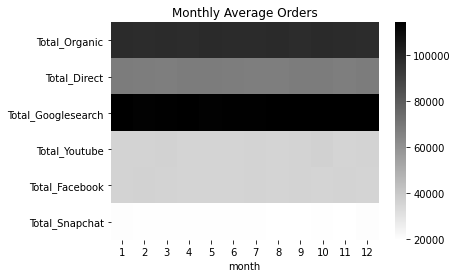

In [9]:
# plot heatmap
ax = sns.heatmap(month_df.T,cmap = 'gist_gray_r')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

# save figure
plt.savefig('Monthly_Average_Orders.png', dpi=100)
ax.set_title("Monthly Average Orders")
plt.show()

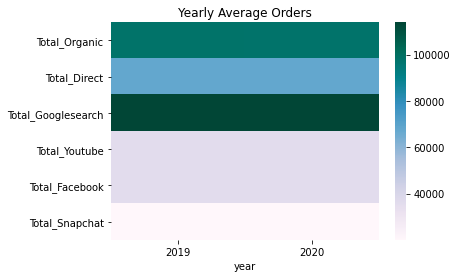

In [10]:
# plot heatmap
ax = sns.heatmap(year_df.T,cmap = 'PuBuGn')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

# save figure
plt.savefig('Yearly_Average_Orders.png', dpi=100)
ax.set_title("Yearly Average Orders")
plt.show()

In [11]:
cleaned_df.describe()

,Organic X Homepage Sessions,Direct X Homepage Sessions,Google Search X Homepage Sessions,YouTube x Homepage Sessions,Facbeook x Homepage Sessions,Snapchat X Homepage Sessions,Organic X Mattress Page Sessions,Direct X Mattress Page Sessions,Google Search X Mattress Page Sessions,YouTube x Mattress Page Sessions,Facbeook x Mattress Page Sessions,Snapchat X Mattress Page Sessions,Organic X Bedding Page Sessions,Direct X Bedding Page Sessions,Google Search X Bedding Page Sessions,YouTube x Bedding Page Sessions,Facbeook x Bedding Page Sessions,Snapchat X Bedding Page Sessions,Organic X Retail Locations Page Sessions,Direct X Retail Locations Page Sessions,Google Search X Retail Locations Page Sessions,YouTube x Retail Locations Page Sessions,Facbeook x Retail Locations Page Sessions,Snapchat X Retail Locations Page Sessions,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat,month,year
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,23002.906977,16014.726402,26976.236662,7995.202462,7940.017784,4010.489740,23049.727770,15956.187415,26950.715458,8016.127223,7954.703146,4007.240766,23006.287278,15976.444596,26977.514364,7966.879617,7961.604651,4033.455540,29065.623803,19967.641587,32994.887825,11999.151847,12062.614227,8041.567715,98124.545828,67915.000000,113899.354309,35977.361149,35918.939808,20092.753762,6.519836,2019.500684
std,2692.338002,1926.874885,2628.189803,1953.856313,1942.463593,1921.636587,2717.356998,1828.706175,2642.406013,1922.291115,1879.992401,1941.799178,2650.629576,1858.457716,2618.961547,1913.316784,1907.523019,1857.213298,7479.659077,4978.407145,7420.995095,5023.918302,5009.067833,4982.171974,2052.617263,1990.350445,2038.986856,1969.578891,1939.561384,2072.266925,3.451913,0.500342
min,17618.000000,12078.000000,20980.000000,3691.000000,2878.000000,-120.000000,17467.000000,11494.000000,21381.000000,2949.000000,3495.000000,-710.000000,17002.000000,10202.000000,21246.000000,2948.000000,3114.000000,-152.000000,17415.000000,11384.000000,20938.000000,3833.000000,3478.000000,-1114.000000,92537.000000,61843.000000,107521.000000,29844.000000,29820.000000,12786.000000,1.000000,2019.000000
25%,20555.500000,14489.000000,24624.500000,6427.000000,6366.000000,2571.500000,20597.000000,14455.000000,24578.000000,6578.000000,6396.500000,2545.500000,20632.500000,14467.500000,24610.000000,6417.000000,6416.500000,2586.000000,20625.000000,14596.000000,24621.000000,6473.500000,6630.000000,2688.500000,96693.500000,66659.000000,112532.000000,34686.500000,34647.500000,18614.000000,4.000000,2019.000000
50%,23001.000000,16045.000000,26957.000000,8020.000000,8028.000000,3968.000000,23070.000000,15989.000000,26862.000000,7965.000000,7947.000000,4052.000000,23171.000000,16071.000000,26929.000000,7978.000000,7997.000000,4031.000000,29074.000000,20036.000000,32997.000000,12179.000000,12055.000000,8012.000000,98220.000000,67809.000000,113959.000000,36022.000000,35926.000000,20115.000000,7.000000,2020.000000
75%,25463.500000,17479.500000,29297.500000,9549.500000,9487.000000,5595.000000,25424.500000,17407.000000,29278.000000,9439.500000,9406.000000,5458.000000,25301.000000,17403.500000,29378.500000,9441.500000,9492.500000,5465.500000,37458.000000,25177.500000,41253.000000,17231.500000,17436.000000,13248.500000,99448.500000,69187.000000,115232.500000,37315.000000,37281.000000,21543.500000,10.000000,2020.000000
max,28857.000000,21090.000000,33295.000000,12634.000000,13909.000000,8998.000000,29196.000000,20357.000000,32777.000000,12977.000000,12452.000000,8403.000000,28491.000000,20355.000000,33139.000000,13034.000000,12388.000000,8371.000000,40966.000000,29180.000000,44867.000000,21023.000000,20755.000

In [12]:
month_df.describe()

,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,98120.238620,67914.513080,113897.321975,35976.371578,35921.272234,20090.358006
std,278.472167,254.986557,262.464337,289.746817,225.624320,289.551809
min,97706.550000,67536.241935,113424.096774,35709.161290,35625.322581,19637.066667
25%,97927.922043,67680.369892,113762.479167,35735.585081,35758.885484,19973.270833
50%,98182.720161,67979.373373,113972.195699,35948.693548,35898.796505,20058.528947
75%,98376.884677,68141.443952,114055.041667,36092.040676,36091.044355,20237.165323
max,98393.661290,68189.403226,114272.661290,36685.516129,36307.701754,20679.516129


In [13]:
year_df.describe()

,Total_Organic,Total_Direct,Total_Googlesearch,Total_Youtube,Total_Facebook,Total_Snapchat
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,98124.596373,67914.832716,113899.364047,35977.357811,35918.795074,20092.682641
std,52.253540,172.936781,10.066577,3.450685,149.624578,73.524242
min,98087.647541,67792.547945,113892.245902,35974.917808,35812.994521,20040.693151
25%,98106.121957,67853.690330,113895.804974,35976.137810,35865.894798,20066.687896
50%,98124.596373,67914.832716,113899.364047,35977.357811,35918.795074,20092.682641
75%,98143.070789,67975.975101,113902.923119,35978.577813,35971.695351,20118.677386
max,98161.545205,68037.117486,113906.482192,35979.797814,36024.595628,20144.672131
